In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
import yfinance as yf

# Use yf.download()
# Note: The end date in yfinance is exclusive.
# To include data for '2019-12-07', set the end date to '2019-12-08'.
df = yf.download('AAPL', start='2012-01-01', end='2019-12-08')

# Check your DataFrame
print(df.head())

/tmp/ipython-input-1987482796.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end='2019-12-08')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2012-01-03  12.345176  12.383302  12.278231  12.290240  302220800
2012-01-04  12.411516  12.448742  12.286633  12.308247  260022000
2012-01-05  12.549312  12.564922  12.388403  12.456850  271269600
2012-01-06  12.680496  12.691003  12.585032  12.601544  318292800
2012-01-09  12.660383  12.841104  12.648975  12.773560  394024400


In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.345176,12.383302,12.278231,12.290240,302220800
2012-01-04,12.411516,12.448742,12.286633,12.308247,260022000
2012-01-05,12.549312,12.564922,12.388403,12.456850,271269600
2012-01-06,12.680496,12.691003,12.585032,12.601544,318292800
2012-01-09,12.660383,12.841104,12.648975,12.773560,394024400
...,...,...,...,...,...
2019-12-02,63.798138,64.785926,63.626665,64.549240,94487200
2019-12-03,62.660618,62.679936,61.897435,62.385289,114430400


In [6]:
df.shape

(1996, 5)

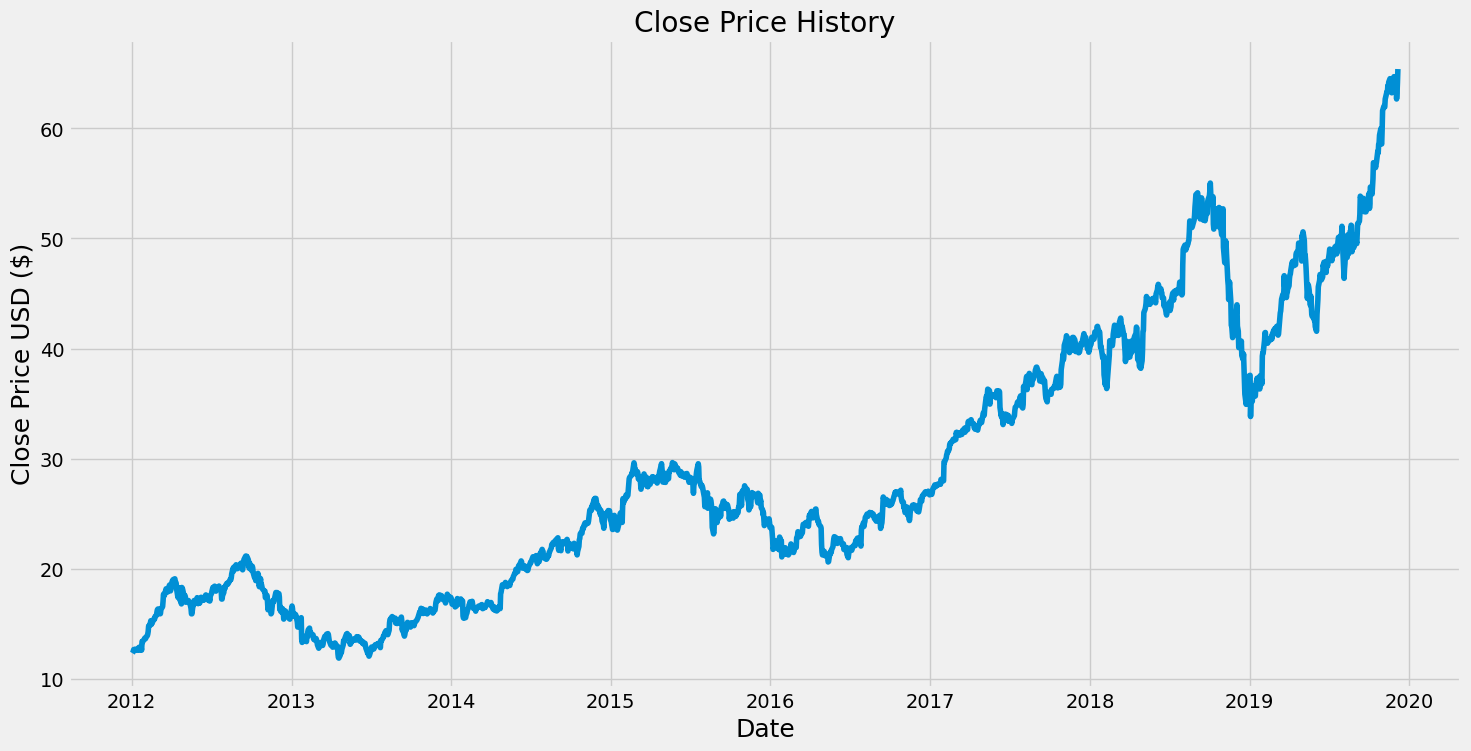

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [11]:
data = df[['Close']]
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1597

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00838339],
       [0.00962379],
       [0.01220021],
       ...,
       [0.95949441],
       [0.97683475],
       [1.        ]])

In [16]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00838339, 0.00962379, 0.01220021, 0.01465303, 0.01427696,
       0.01512452, 0.01473721, 0.01408617, 0.01319931, 0.01594403,
       0.01841937, 0.01765606, 0.01347429, 0.01746516, 0.01353606,
       0.02827022, 0.02713074, 0.02861814, 0.03183442, 0.03378217,
       0.0336194 , 0.03301874, 0.03557827, 0.03798621, 0.0407142 ,
       0.04512045, 0.05437609, 0.05451648, 0.05966936, 0.06351972,
       0.05690203, 0.05945034, 0.0593998 , 0.06654508, 0.06552932,
       0.06740959, 0.0707886 , 0.07266896, 0.07808546, 0.08203138,
       0.08317083, 0.08356936, 0.07682265, 0.07519478, 0.07543616,
       0.08177881, 0.08356373, 0.08739748, 0.0964343 , 0.10849106,
       0.10623458, 0.10624029, 0.11495725, 0.11768522, 0.11574307,
       0.11396943, 0.11212268, 0.11825771, 0.12246739, 0.12422994])]
[np.float64(0.11987422248520574)]



In [17]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [18]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1537, 60, 1)

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1537/1537 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - loss: 0.0016


In [22]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [23]:
x_test=np.array(x_test)

In [24]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [26]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
#

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [27]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

np.float64(1.0523472166897958)

/tmp/ipython-input-671531106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


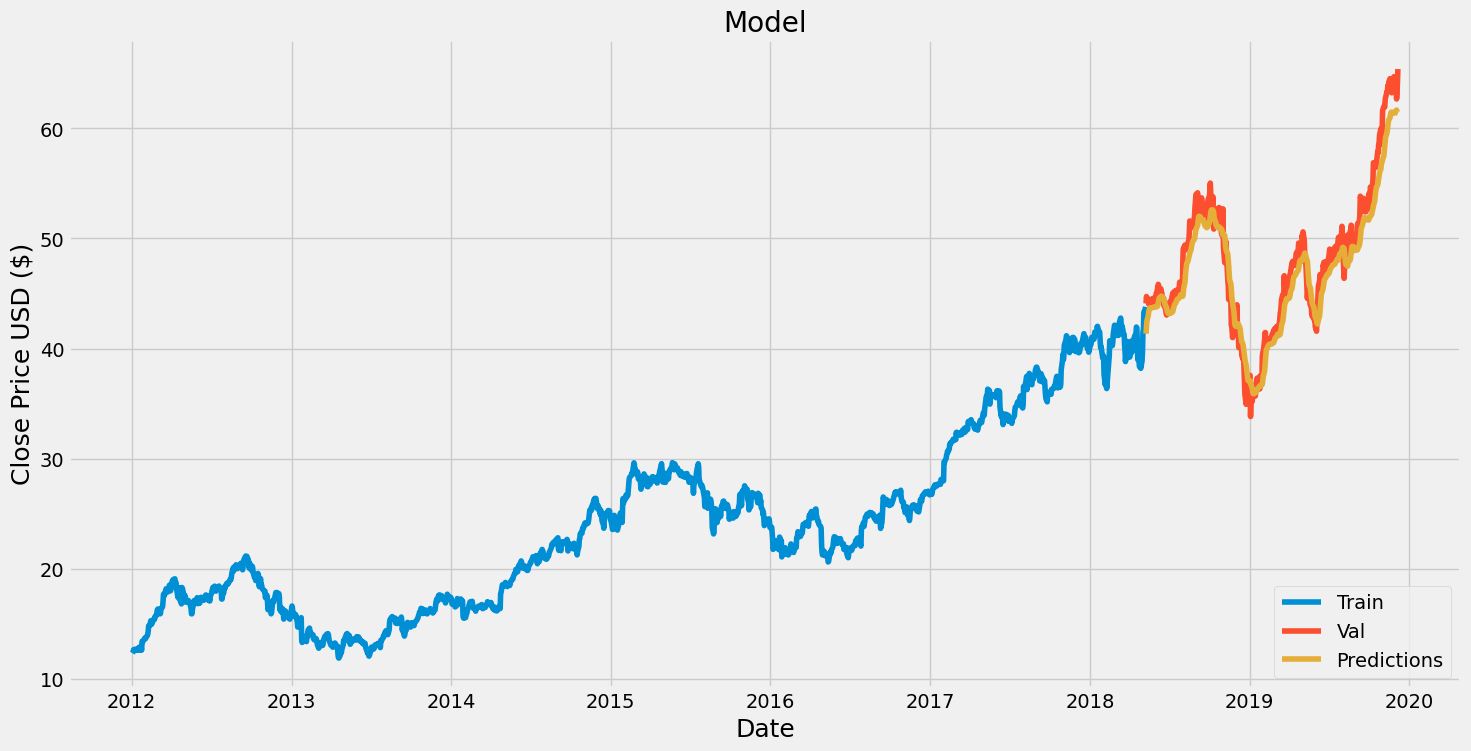

In [28]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [29]:
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2018-05-09,44.099785,41.354733
2018-05-10,44.730591,41.945492
2018-05-11,44.560471,42.507561
2018-05-14,44.456501,42.964893
2018-05-15,44.052460,43.303116
...,...,...
2019-12-02,63.798138,61.625832
2019-12-03,62.660618,61.654037
